<h1>Progetto Business Intelligence per i Servizi Finanziari</h1>

<h2>Sommario dei dati utilizzati</h2>

Download dei dati

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
tickers = ['AAPL', 'NVDA', 'JPM', 'BAC', 'JNJ', 'PFE', '^GSPC']

In [21]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date'])

In [22]:
all_data = get(tickers, start='2014-05-31', end='2024-05-31')
all_data.head()

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.859400   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.140234   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.370211   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.450142   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.393898   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

Prendo solo la colonna 'Adj Close' per ogni asset e li fondo in un unico dataset con le date come indici, i ticker come colonne e l'adj close come valori.

In [23]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [24]:
daily_close_px = just_closing_prices.pivot(index='Date', columns='Ticker', values='Adj Close')
daily_close_px.drop(['^GSPC'], axis=1, inplace=True)
daily_close_px.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-02,19.859400,12.456399,77.708122,41.902782,0.450742,19.234695
2014-06-03,20.140234,12.415586,77.928680,42.092045,0.448839,19.157015
2014-06-04,20.370211,12.415586,78.096001,42.152603,0.449315,19.189381
2014-06-05,20.450142,12.595166,78.506729,42.871811,0.451219,19.267071
2014-06-06,20.393898,12.725771,78.476303,43.129200,0.452884,19.046949


Grafico

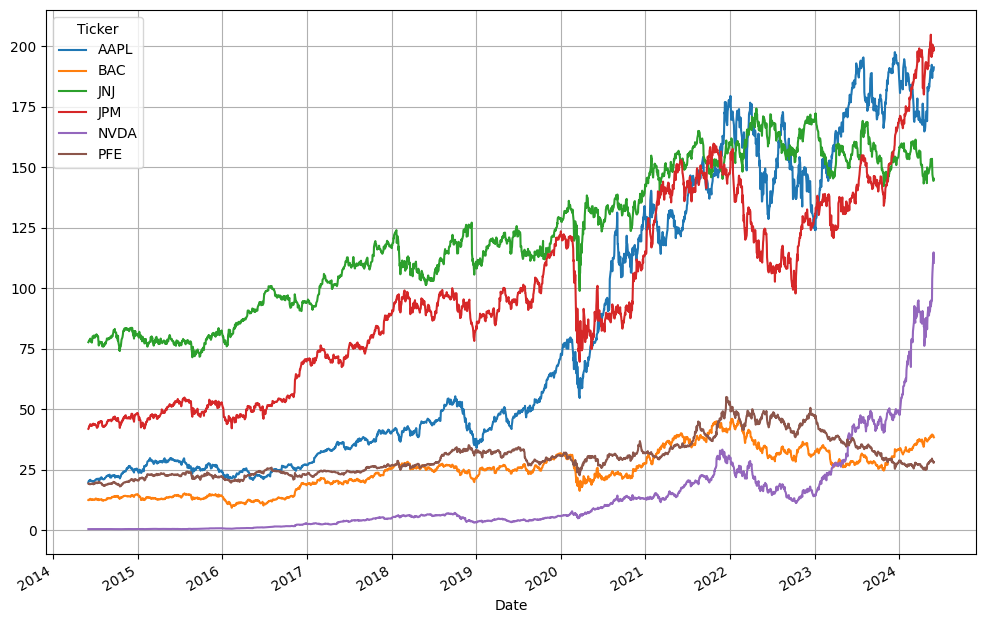

In [25]:
daily_close_px.plot(figsize=(12,8))
plt.grid()

Grafici di prezzi e volumi per ogni asset

In [ ]:
for ticker in tickers:
    top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan = 4)
    top.plot(daily_close_px.index,
            daily_close_px[ticker],
            label = 'Prezzo di chiusura')
    plt.title(f'{ticker} Prezzi rettificati di chiusura dal 2014 al 2024')
    plt.legend(loc=2)
    plt.grid()
    bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
    bottom.bar(all_data.Volume.loc[ticker].index, all_data.Volume.loc[ticker])
    plt.title(f'{ticker} - Volume degli scambi giornalieri')
    plt.gcf().set_size_inches(12,8)
    plt.subplots_adjust(hspace=0.75)
    plt.grid()
    plt.show()

<h2>Statistiche descrittive</h2>

<h3>Rendimento percentuale</h3>

In [26]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.dropna(inplace=True)
daily_pct_change.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014141,-0.003277,0.002838,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001439,0.001061,0.001690
2014-06-05,0.003924,0.014464,0.005259,0.017062,0.004237,0.004049
2014-06-06,-0.002750,0.010369,-0.000388,0.006004,0.003692,-0.011425
2014-06-09,0.016002,0.016036,0.000388,0.007899,0.001051,-0.002379


<h3>Rendimento Cumulato</h3>

In [27]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014141,0.996723,1.002838,1.004517,0.995776,0.995961
2014-06-04,1.025721,0.996723,1.004991,1.005962,0.996832,0.997644
2014-06-05,1.029746,1.011140,1.010277,1.023126,1.001056,1.001683
2014-06-06,1.026914,1.021625,1.009885,1.029268,1.004752,0.990239
2014-06-09,1.043346,1.038007,1.010277,1.037398,1.005808,0.987883
...,...,...,...,...,...,...
2024-05-23,9.410154,3.125558,1.926440,4.699449,230.265615,1.491576
2024-05-24,9.566251,3.167850,1.891308,4.789897,236.188681,1.501453
2024-05-28,9.566755,3.137528,1.857978,4.761020,252.675678,1.471300


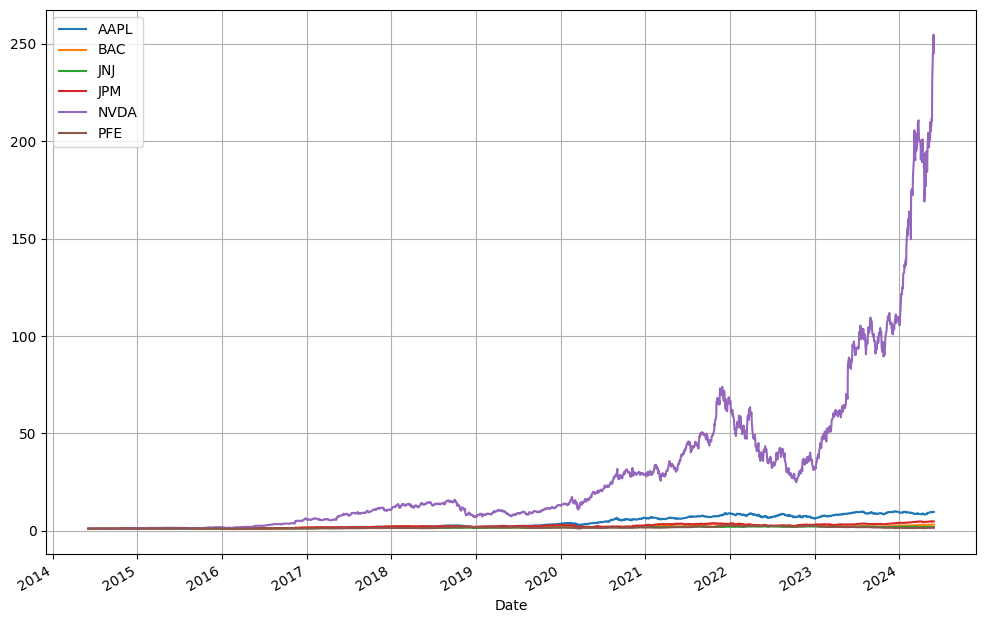

In [28]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2)
plt.grid()

<h3>Rendimento composto annuo</h3>

In [29]:
annual_compounded_returns = (cum_daily_return.iloc[-1] ** (1 / 10)) - 1
annual_compounded_returns

Ticker
AAPL    0.254217
BAC     0.119154
JNJ     0.064569
JPM     0.168781
NVDA    0.733564
PFE     0.039002
Name: 2024-05-30 00:00:00, dtype: float64

<h3>Rendimento Semplice Netto e Lordo e Rendimento Logaritmico</h3>

In [30]:
daily_RS_gross = daily_close_px / daily_close_px.shift(1)
daily_RS_gross.dropna(inplace=True)
daily_RS_gross.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014141,0.996723,1.002838,1.004517,0.995776,0.995961
2014-06-04,1.011419,1.000000,1.002147,1.001439,1.001061,1.001690
2014-06-05,1.003924,1.014464,1.005259,1.017062,1.004237,1.004049
2014-06-06,0.997250,1.010369,0.999612,1.006004,1.003692,0.988575
2014-06-09,1.016002,1.016036,1.000388,1.007899,1.001051,0.997621


In [31]:
daily_RS_net = daily_close_px.pct_change(1)
daily_RS_net.dropna(inplace=True)
daily_RS_net.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014141,-0.003277,0.002838,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001439,0.001061,0.001690
2014-06-05,0.003924,0.014464,0.005259,0.017062,0.004237,0.004049
2014-06-06,-0.002750,0.010369,-0.000388,0.006004,0.003692,-0.011425
2014-06-09,0.016002,0.016036,0.000388,0.007899,0.001051,-0.002379


In [32]:
import numpy as np
daily_RL = np.log(daily_RS_gross)
daily_RL.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014042,-0.003282,0.002834,0.004507,-0.004233,-0.004047
2014-06-04,0.011354,0.000000,0.002145,0.001438,0.001060,0.001688
2014-06-05,0.003916,0.014361,0.005245,0.016918,0.004228,0.004040
2014-06-06,-0.002754,0.010316,-0.000388,0.005986,0.003685,-0.011491
2014-06-09,0.015875,0.015908,0.000388,0.007868,0.001050,-0.002382


Unisco tutti i rendimenti per ogni asset e faccio un grafico

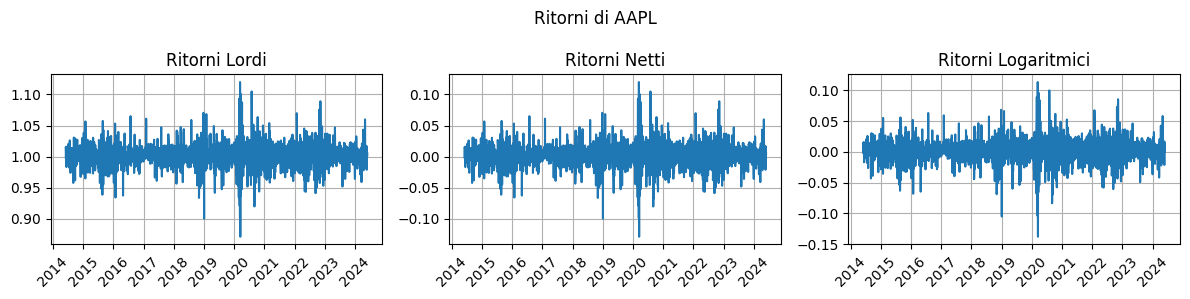

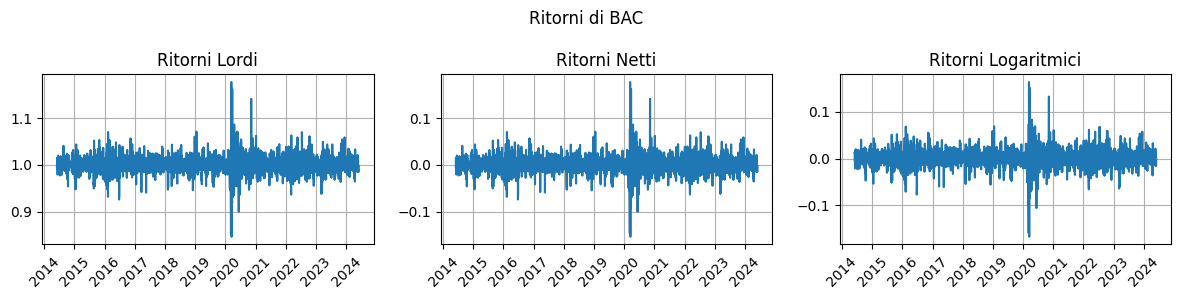

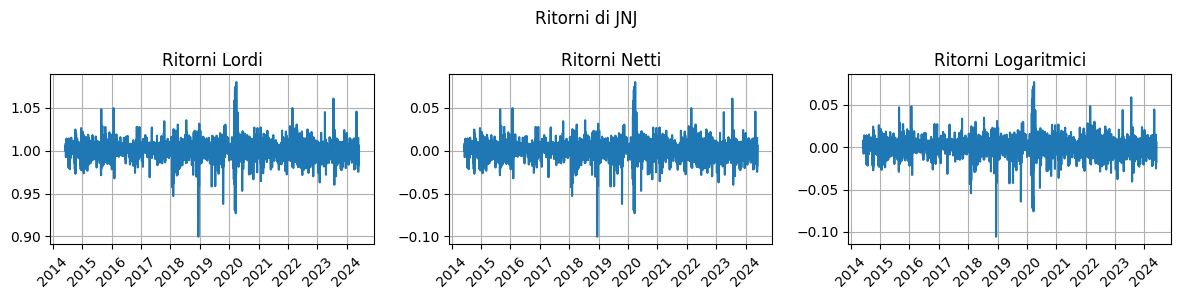

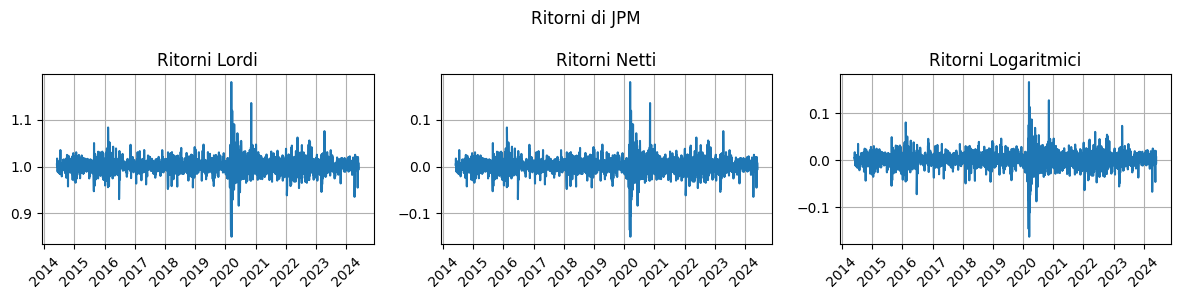

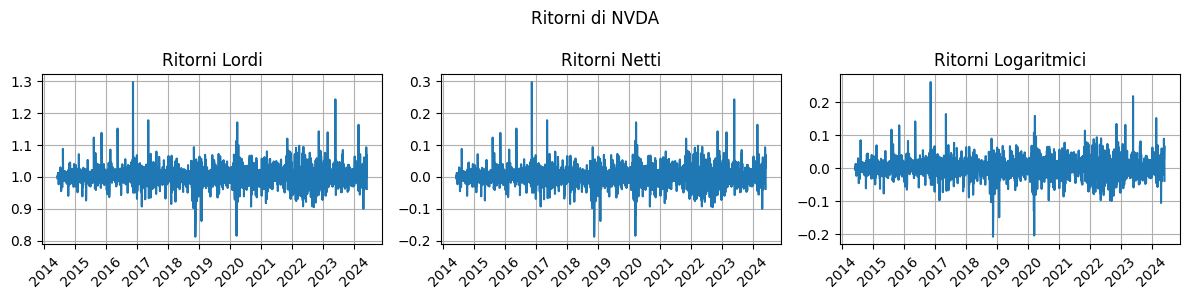

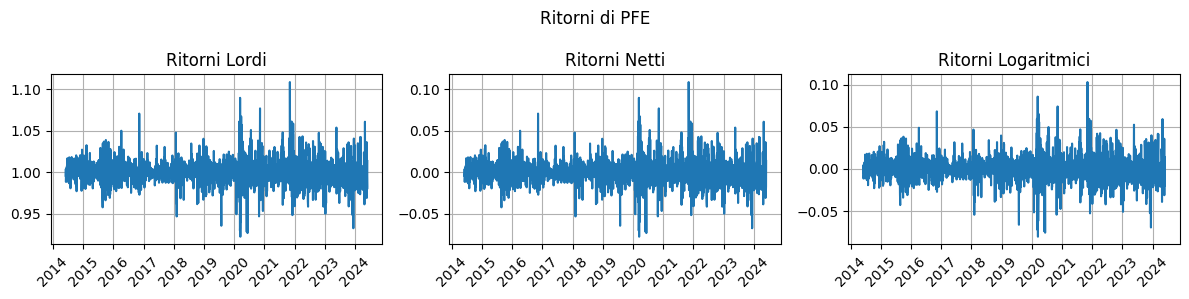

In [33]:
for ticker in daily_RS_gross.columns:
    fig, axs = plt.subplots(1,3, figsize=(12,3))
    fig.suptitle(f'Ritorni di {ticker}')
    axs[0].plot(daily_RS_gross[ticker])
    axs[0].set_title('Ritorni Lordi')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()
    axs[1].plot(daily_RS_net[ticker])
    axs[1].set_title('Ritorni Netti')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()
    axs[2].plot(daily_RL[ticker])
    axs[2].set_title('Ritorni Logaritmici')
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].grid()
    plt.tight_layout()
    plt.show()

<h3>Describe per ogni asset</h3>

In [34]:
aapl = daily_pct_change['AAPL']
aapl.describe()

count    2516.000000
mean        0.001060
std         0.017841
min        -0.128647
25%        -0.007315
50%         0.000821
75%         0.010141
max         0.119808
Name: AAPL, dtype: float64

In [35]:
nvda = daily_pct_change['NVDA']
nvda.describe()

count    2516.000000
mean        0.002629
std         0.029824
min        -0.187559
25%        -0.011623
50%         0.002391
75%         0.016955
max         0.298067
Name: NVDA, dtype: float64

In [36]:
jpm = daily_pct_change['JPM']
jpm.describe()

count    2516.000000
mean        0.000764
std         0.016972
min        -0.149649
25%        -0.007065
50%         0.000615
75%         0.008524
max         0.180125
Name: JPM, dtype: float64

In [37]:
bac = daily_pct_change['BAC']
bac.describe()

count    2516.000000
mean        0.000637
std         0.019474
min        -0.153974
25%        -0.009021
50%         0.000488
75%         0.010463
max         0.177962
Name: BAC, dtype: float64

In [38]:
jnj = daily_pct_change['JNJ']
jnj.describe()

count    2516.000000
mean        0.000313
std         0.011374
min        -0.100379
25%        -0.004921
50%         0.000293
75%         0.005978
max         0.079977
Name: JNJ, dtype: float64

In [39]:
pfe = daily_pct_change['PFE']
pfe.describe()

count    2516.000000
mean        0.000255
std         0.014380
min        -0.077346
25%        -0.006703
50%         0.000000
75%         0.007036
max         0.108552
Name: PFE, dtype: float64

<h3>Grafici a 3 sezioni per ogni azione</h3>

Calcolo il numero corretto di colonne utilizzando la formula di Freedman-Diaconis

In [43]:
from scipy import stats

bins = (np.max(aapl, axis = 0) - np.min(aapl, axis = 0)) / (2*stats.iqr(aapl, axis = 0) / np.power(len(aapl), 1.0/3))
bins = int(bins)

bins

96

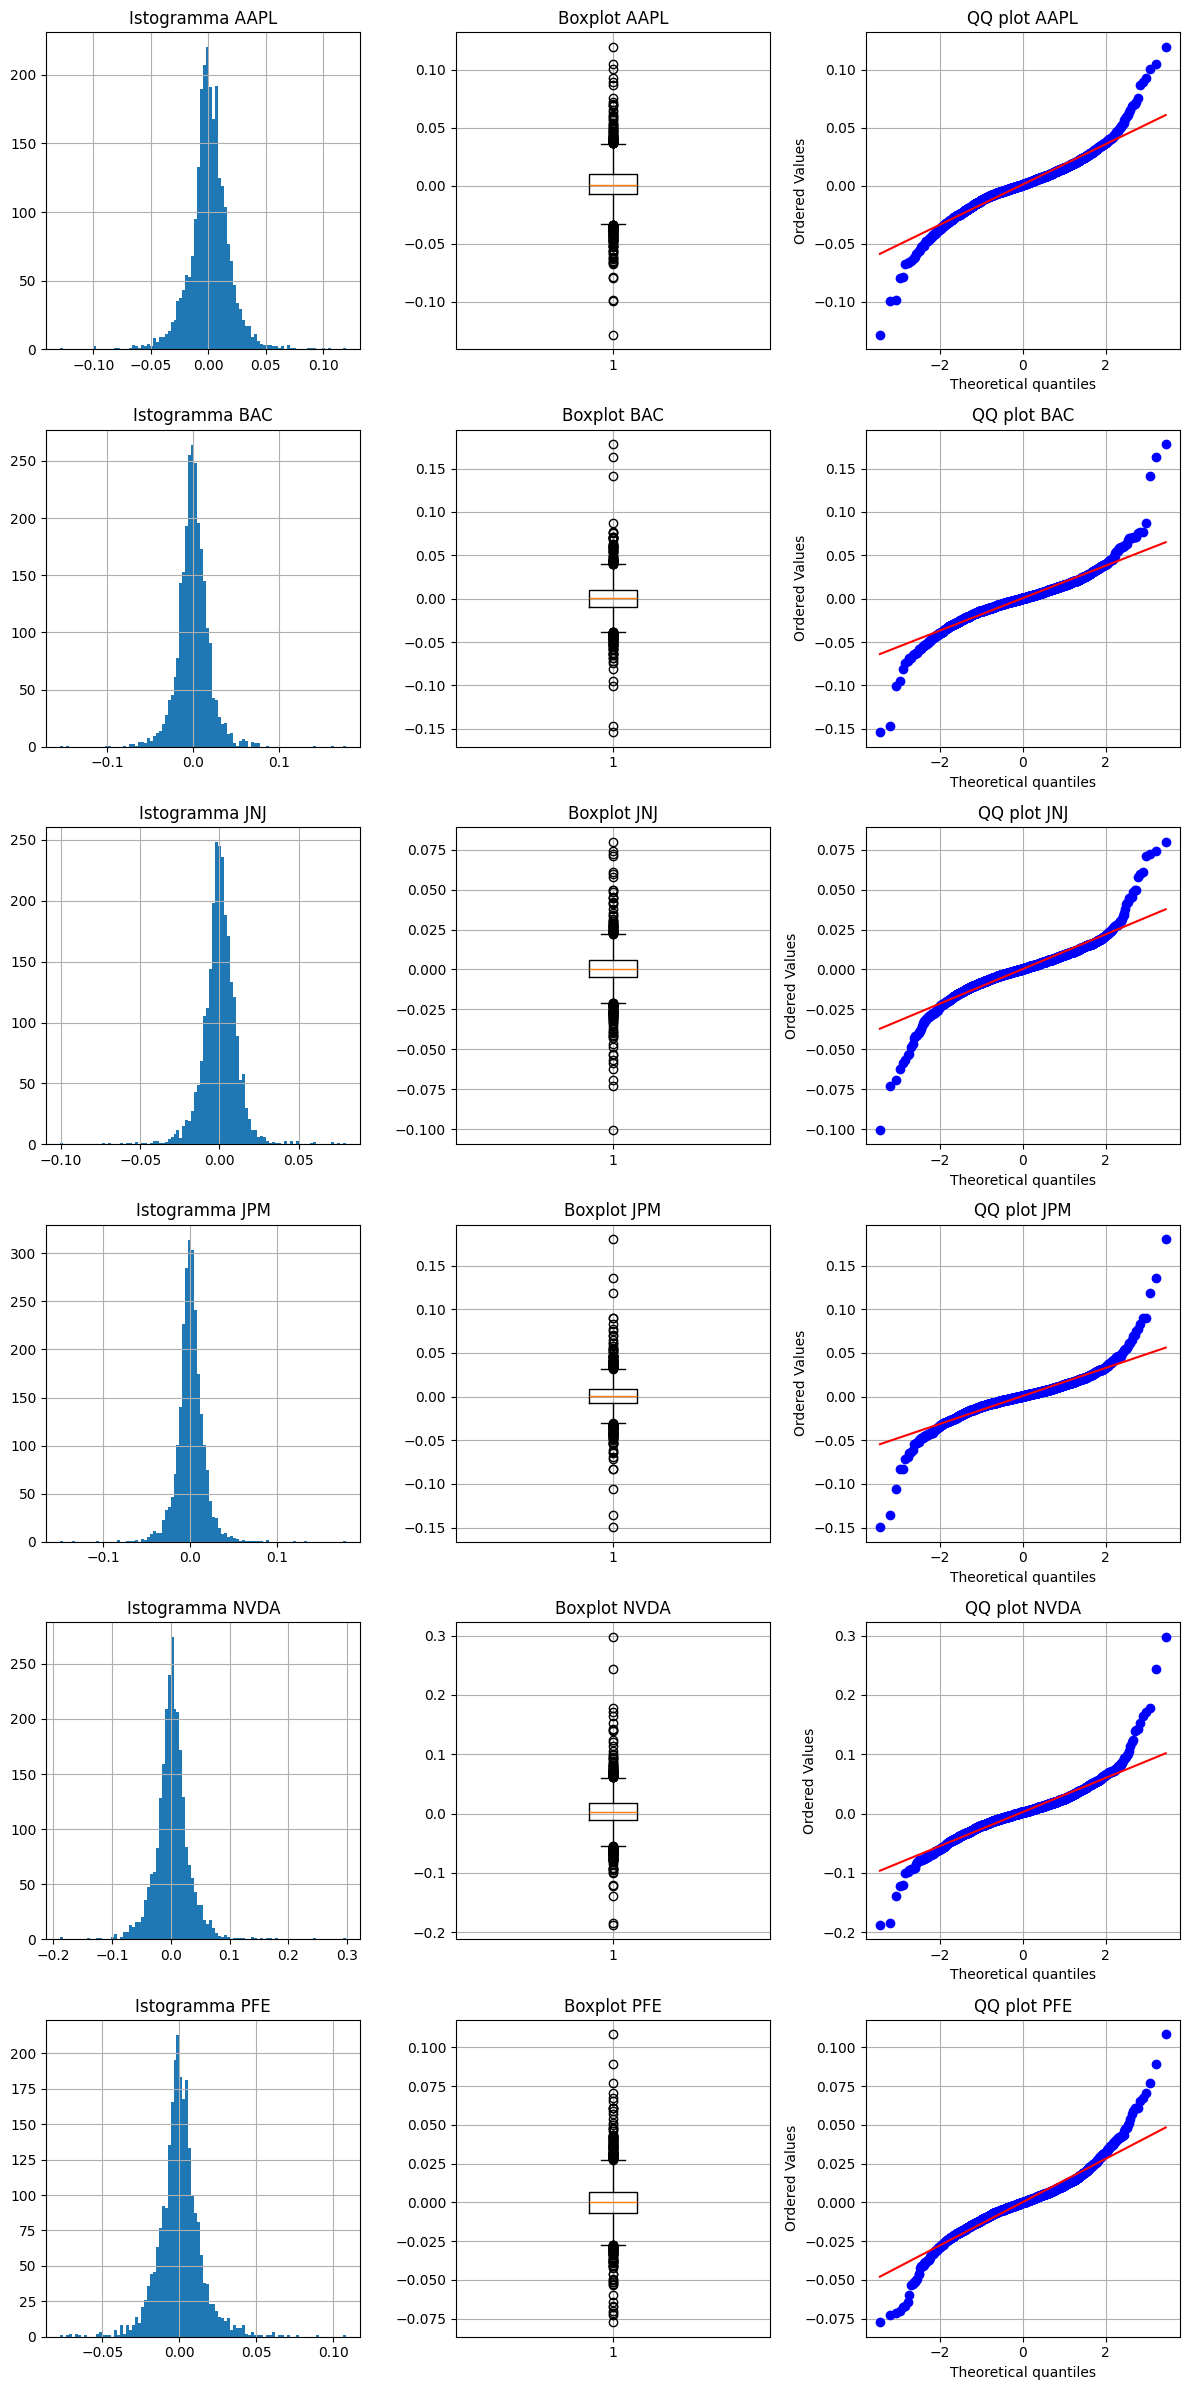

In [65]:
fig, axs = plt.subplots(6,3, figsize=(12,24))
for i, ticker in enumerate(daily_pct_change.columns):
    axs[i,0].hist(daily_pct_change[ticker], bins=bins)
    axs[i,0].set_title(f'Istogramma {ticker}')
    axs[i,0].grid()
    axs[i,1].boxplot(daily_pct_change[ticker])
    axs[i,1].set_title(f'Boxplot {ticker}')
    axs[i,1].grid()
    stats.probplot(daily_pct_change[ticker], dist='norm', plot=axs[i,2])
    axs[i,2].set_title(f'QQ plot {ticker}')
    axs[i,2].grid()
plt.tight_layout()
plt.show()

<h3>Statistiche descrittive univariate</h3>